# Import Libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Objective Function (Modified Easom) 

In [37]:
def modified_easom_function(x, y):
    """
    A more complex multi-modal function.
    Easom-like part: -cos(x) * cos(y) * exp(-((x - pi)^2 + (y - pi)^2))
    Shifted Sphere part: 0.01 * ((x - 2)^2 + (y + 1)^2)
    """
    pi = np.pi
    term1 = -np.cos(x) * np.cos(y) * np.exp(-((x - pi)**2 + (y - pi)**2))
    term2 = 0.01 * ((x - 2)**2 + (y + 1)**2) # Weaker sphere influence
    return term1 + term2

# (1+1)-ES Algorithm (No changes needed in this function itself)

In [38]:
def one_plus_one_es(
    obj_func,
    bounds,
    n_generations=200,       # Default value, can be overridden
    initial_sigma=1.0,       # Default value
    n_adapt_sigma=10,        # Adapt sigma every N_adapt_sigma generations
    adaptation_factor=0.85   # Factor to change sigma (0.8 to <1)
    ):
    min_x, max_x = bounds[0]
    min_y, max_y = bounds[1]

    current_x = np.random.uniform(min_x, max_x)
    current_y = np.random.uniform(min_y, max_y)
    current_fitness = obj_func(current_x, current_y)
    sigma = initial_sigma
    successful_mutations_in_period = 0

    history_fitness = [current_fitness]
    history_sigma = [sigma]
    history_solutions = [(current_x, current_y)]

    print(f"Initial: x={current_x:.3f}, y={current_y:.3f}, Fitness={current_fitness:.3f}, Sigma={sigma:.3f}")

    for generation in range(1, n_generations + 1):
        offspring_x = np.clip(current_x + np.random.normal(0, sigma), min_x, max_x)
        offspring_y = np.clip(current_y + np.random.normal(0, sigma), min_y, max_y)
        offspring_fitness = obj_func(offspring_x, offspring_y)

        if offspring_fitness <= current_fitness:
            current_x = offspring_x
            current_y = offspring_y
            current_fitness = offspring_fitness
            successful_mutations_in_period += 1

        if generation % n_adapt_sigma == 0:
            success_rate = successful_mutations_in_period / n_adapt_sigma
            if success_rate > 0.2:
                sigma /= adaptation_factor
            elif success_rate < 0.2:
                sigma *= adaptation_factor
            successful_mutations_in_period = 0

        history_fitness.append(current_fitness)
        history_sigma.append(sigma)
        history_solutions.append((current_x, current_y))

        if generation % 50 == 0 or generation == n_generations : # Adjusted print frequency
             print(f"Gen {generation:3d}: x={current_x:.3f}, y={current_y:.3f}, Fitness={current_fitness:.3f}, Sigma={sigma:.3f}")

    best_solution_xy = (current_x, current_y)
    return best_solution_xy, current_fitness, history_fitness, history_sigma, history_solutions


# Run the ES for the Modified Easom Function


In [39]:
search_bounds = [(-5.0, 5.0), (-5.0, 5.0)]
# Parameters for the complex function (might need more exploration)
num_generations_complex = 500 # Increased for complex function
sigma_init_complex = 1.5      # Start more explorative
adapt_interval_complex = 15   # Adapt sigma a bit less frequently
adapt_factor_complex = 0.85

print("Starting (1+1)-ES with 1/5th rule for Modified Easom Function...")
best_solution, best_fitness, fitness_history, sigma_history, solution_history = \
    one_plus_one_es(
        modified_easom_function,
        search_bounds,
        num_generations_complex,
        sigma_init_complex,
        adapt_interval_complex,
        adapt_factor_complex
    )

print("\n--- ES Run Finished (Modified Easom Function) ---")
print(f"Best solution found: x={best_solution[0]:.4f}, y={best_solution[1]:.4f}")
print(f"Best fitness: {best_fitness:.4f}")
# For Modified Easom, the global minimum is near (pi, pi) and fitness is approx -0.8155 or lower
pi_val = np.pi
print(f"Approximate expected global minimum is near x={pi_val:.4f}, y={pi_val:.4f} with fitness around -0.8155 (or lower)")

Starting (1+1)-ES with 1/5th rule for Modified Easom Function...
Initial: x=-4.679, y=1.768, Fitness=0.523, Sigma=1.500
Gen  50: x=2.240, y=-1.076, Fitness=0.001, Sigma=1.765
Gen 100: x=2.940, y=3.058, Fitness=-0.758, Sigma=1.084
Gen 150: x=2.977, y=3.166, Fitness=-0.776, Sigma=0.566
Gen 200: x=3.088, y=3.060, Fitness=-0.809, Sigma=0.347
Gen 250: x=3.162, y=3.096, Fitness=-0.815, Sigma=0.213
Gen 300: x=3.159, y=3.102, Fitness=-0.815, Sigma=0.111
Gen 350: x=3.122, y=3.096, Fitness=-0.816, Sigma=0.068
Gen 400: x=3.132, y=3.124, Fitness=-0.816, Sigma=0.042
Gen 450: x=3.132, y=3.115, Fitness=-0.817, Sigma=0.022
Gen 500: x=3.133, y=3.116, Fitness=-0.817, Sigma=0.013

--- ES Run Finished (Modified Easom Function) ---
Best solution found: x=3.1335, y=3.1163
Best fitness: -0.8167
Approximate expected global minimum is near x=3.1416, y=3.1416 with fitness around -0.8155 (or lower)


# Plotting Results


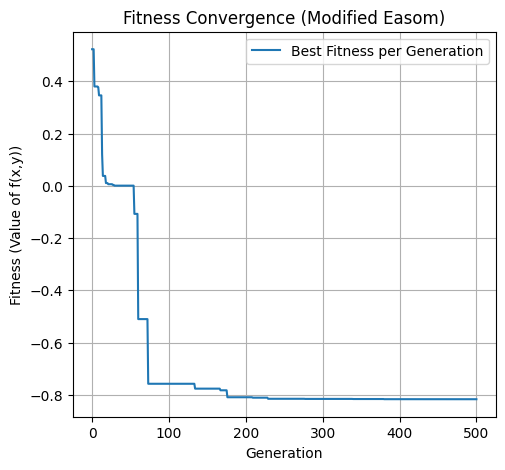

In [40]:
# Plot Fitness History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fitness_history, label='Best Fitness per Generation')
plt.xlabel('Generation')
plt.ylabel('Fitness (Value of f(x,y))')
plt.title('Fitness Convergence (Modified Easom)')
plt.legend()
plt.grid(True)

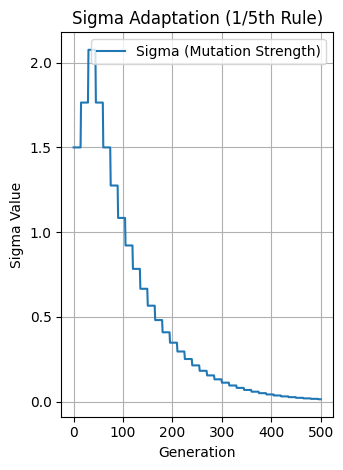

In [41]:
# Plot Sigma History
plt.subplot(1, 2, 2)
plt.plot(sigma_history, label='Sigma (Mutation Strength)')
plt.xlabel('Generation')
plt.ylabel('Sigma Value')
plt.title('Sigma Adaptation (1/5th Rule)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
# Plot Solution Path on Contour Map
x_coords = [s[0] for s in solution_history]
y_coords = [s[1] for s in solution_history]

delta = 0.05 # Finer grid for more detail for complex function
x_range = np.arange(search_bounds[0][0] - 0.5, search_bounds[0][1] + 0.5, delta) # Adjusted range slightly for better view
y_range = np.arange(search_bounds[1][0] - 0.5, search_bounds[1][1] + 0.5, delta)
X_contour, Y_contour = np.meshgrid(x_range, y_range)
Z_contour = modified_easom_function(X_contour, Y_contour)

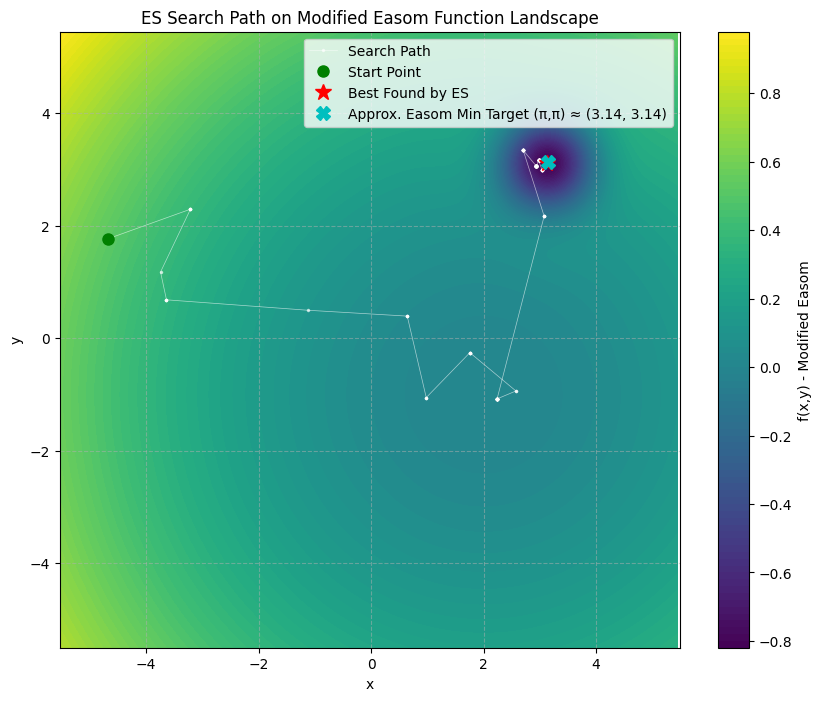

In [43]:
plt.figure(figsize=(10, 8)) # Made figure larger
plt.contourf(X_contour, Y_contour, Z_contour, levels=100, cmap='viridis') # More levels
plt.colorbar(label='f(x,y) - Modified Easom')

# Plotting the search path
plt.plot(x_coords, y_coords, 'w.-', alpha=0.6, markersize=3, linewidth=0.5, label='Search Path')
plt.plot(x_coords[0], y_coords[0], 'go', markersize=8, label='Start Point')
plt.plot(best_solution[0], best_solution[1], 'r*', markersize=12, label='Best Found by ES')


# Marking the known feature points of the Modified Easom function
plt.plot(np.pi, np.pi, 'cX', markersize=10, label=f'Approx. Easom Min Target (π,π) ≈ ({np.pi:.2f}, {np.pi:.2f})')

plt.xlabel('x')
plt.ylabel('y')
plt.title('ES Search Path on Modified Easom Function Landscape')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.axis('equal')
plt.show()